In [1]:
# !pip install mtcnn
# !pip install retina-face

In [2]:
import cv2
import time
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from retinaface import RetinaFace


In [9]:
def detect_faces_haar(image_path):

    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # Read the image
    image = cv2.imread(image_path)

    real = image.copy()

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    start_time = time.time()
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30))
    end_time = time.time()

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the image with detected faces

    fig, axs = plt.subplots(1,2)
    axs[0].set_title("Real Image")
    axs[1].set_title("Modified Image")
    axs[0].imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB))
    axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Return the time taken for detection
    detection_time = end_time - start_time

    print("Time taken for face detection: {:.2f} seconds".format(detection_time))


In [10]:
def detect_faces_mtcnn(image_path):

  # Load the pre-trained MTCNN model
  detector = MTCNN()

  # Load an image
  image = cv2.imread(image_path)
  
  real = image.copy()
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Detect faces in the image
  start_time = time.time()

  faces = detector.detect_faces(image_rgb)

  end_time = time.time()

  # Draw bounding boxes around the faces
  for face in faces:
      x, y, w, h = face['box']
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

  # Display the result

  fig, axs = plt.subplots(1,2)
  axs[0].set_title("Real Image")
  axs[1].set_title("Modified Image")
  axs[0].imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB))
  axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  # Return the time taken for detection
  detection_time = end_time - start_time

  print("Time taken for face detection: {:.2f} seconds".format(detection_time))


In [14]:
def detect_faces_retinaface(image_path):
  # Initialize RetinaFace detector
  start_time = time.time()
  result = RetinaFace.detect_faces(image_path)
  end_time = time.time()

  image = cv2.imread(image_path)

  real = image.copy()
  face_data = result
  # Draw bounding boxes on faces
  for face_key, face_info in face_data.items():
    x1, y1, x2, y2 = face_info['facial_area']
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Draw bounding box

  # Display the image with detected faces
  fig, axs = plt.subplots(1,2)
  axs[0].set_title("Real Image")
  axs[1].set_title("Modified Image")
  axs[0].imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB))
  axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


    # Return the time taken for detection
  detection_time = end_time - start_time

  print("Time taken for face detection: {:.2f} seconds".format(detection_time))

Haar Cascade Implementation
-----------------------------------------------
Time taken for face detection: 0.01 seconds
MTCNN Implementation
-----------------------------------------------
1/1 [==============================] - 0s 102ms/step
Time taken for face detection: 0.89 seconds
RetinaFace Implementation
-----------------------------------------------
Time taken for face detection: 1.59 seconds


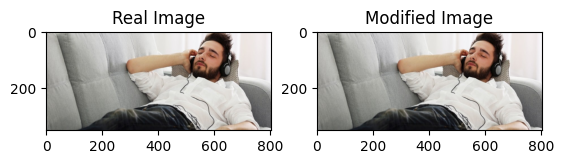

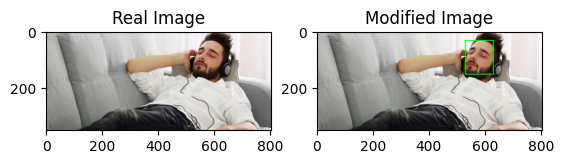

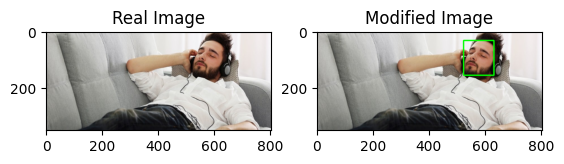

In [17]:
image_path = "single.jpg"
print("Haar Cascade Implementation")
print("-----------------------------------------------")
detect_faces_haar(image_path)
print("MTCNN Implementation")
print("-----------------------------------------------")
detect_faces_mtcnn(image_path)
print("RetinaFace Implementation")
print("-----------------------------------------------")
detect_faces_retinaface(image_path)

Haar Cascade Implementation
-----------------------------------------------
Time taken for face detection: 0.01 seconds
MTCNN Implementation
-----------------------------------------------
3/3 [==============================] - 0s 13ms/step
Time taken for face detection: 0.88 seconds
RetinaFace Implementation
-----------------------------------------------
Time taken for face detection: 1.40 seconds


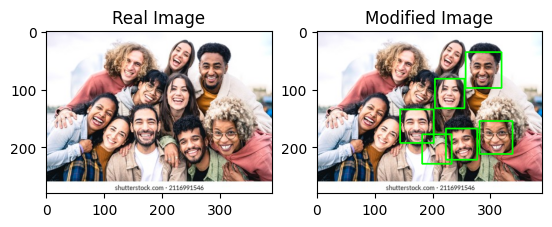

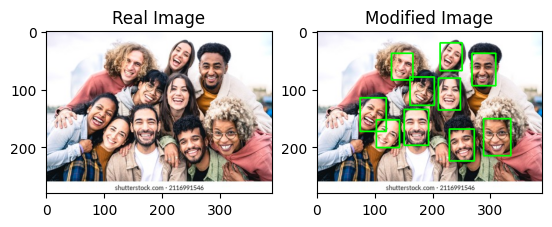

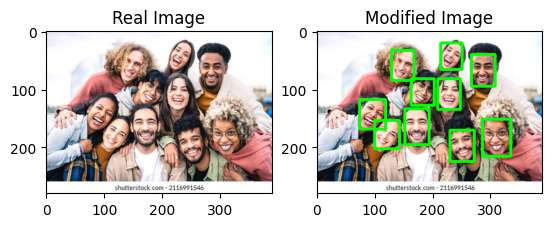

In [18]:
image_path = "group.jpg"
print("Haar Cascade Implementation")
print("-----------------------------------------------")
detect_faces_haar(image_path)
print("MTCNN Implementation")
print("-----------------------------------------------")
detect_faces_mtcnn(image_path)
print("RetinaFace Implementation")
print("-----------------------------------------------")
detect_faces_retinaface(image_path)